In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train = 'train_data.txt'
test = 'test_data.txt'
test_solution = 'test_data_solution.txt'

df_train = pd.read_csv(train, sep=' ::: ', engine='python', names=['id', 'title', 'genre', 'description'])
df_test = pd.read_csv(test, sep=' ::: ', engine='python', names=['id', 'title', 'description'])
df_solution = pd.read_csv(test_solution, sep=' ::: ', engine='python', names=['id', 'title', 'genre', 'description'])

In [ ]:
df_train.drop_duplicates(subset='description', inplace=True)
df_test.drop_duplicates(subset='description', inplace=True)

In [ ]:
df_train.dropna(subset=['description', 'genre'], inplace=True)
df_test.dropna(subset=['description'], inplace=True)
df_solution.dropna(subset=['description', 'genre'], inplace=True)

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_solution.reset_index(drop=True, inplace=True)

In [ ]:
df_solution = df_solution[df_solution['id'].isin(df_test['id'])]

df_test = df_test.sort_values(by='id').reset_index(drop=True)
df_solution = df_solution.sort_values(by='id').reset_index(drop=True)

y_test = df_solution['genre']

In [ ]:
df_train['clean'] = df_train['description'].apply(lambda x: re.sub(r'<.*?>', '', x))
df_train['clean'] = df_train['clean'].apply(lambda x: re.sub(r'\d+', '', x))
df_train['clean'] = df_train['clean'].apply(lambda x: x.lower())
df_train['clean'] = df_train['clean'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_train['clean'] = df_train['clean'].apply(lambda x: x.strip())


In [ ]:
df_test['clean'] = df_test['description'].apply(lambda x: re.sub(r'<.*?>', '', x))
df_test['clean'] = df_test['clean'].apply(lambda x: re.sub(r'\d+', '', x))
df_test['clean'] = df_test['clean'].apply(lambda x: x.lower())
df_test['clean'] = df_test['clean'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_test['clean'] = df_test['clean'].apply(lambda x: x.strip())

In [ ]:
stop_words = set(stopwords.words('english'))

df_train['clean'] = df_train['clean'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

df_test['clean'] = df_test['clean'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

X_train = vectorizer.fit_transform(df_train['clean'])
X_test = vectorizer.transform(df_test['clean'])

y_train = df_train['genre']
y_test = df_solution['genre']

In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (54072, 1000)
y_test shape: (54072,)


In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

print("Model1: Naive Bayes\n")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Classification Report:\n", classification_report(y_test, nb_preds,zero_division=0))

Model1: Naive Bayes

Accuracy: 0.4834664891256103
Classification Report:
               precision    recall  f1-score   support

      action       0.46      0.04      0.08      1314
       adult       0.67      0.01      0.01       590
   adventure       0.33      0.00      0.00       773
   animation       0.50      0.00      0.01       496
   biography       0.00      0.00      0.00       264
      comedy       0.50      0.31      0.38      7434
       crime       0.00      0.00      0.00       505
 documentary       0.54      0.86      0.66     13086
       drama       0.42      0.81      0.56     13560
      family       0.40      0.00      0.01       774
     fantasy       0.00      0.00      0.00       321
   game-show       0.91      0.27      0.42       193
     history       0.00      0.00      0.00       243
      horror       0.68      0.18      0.29      2203
       music       0.64      0.12      0.21       719
     musical       0.00      0.00      0.00       273
     my

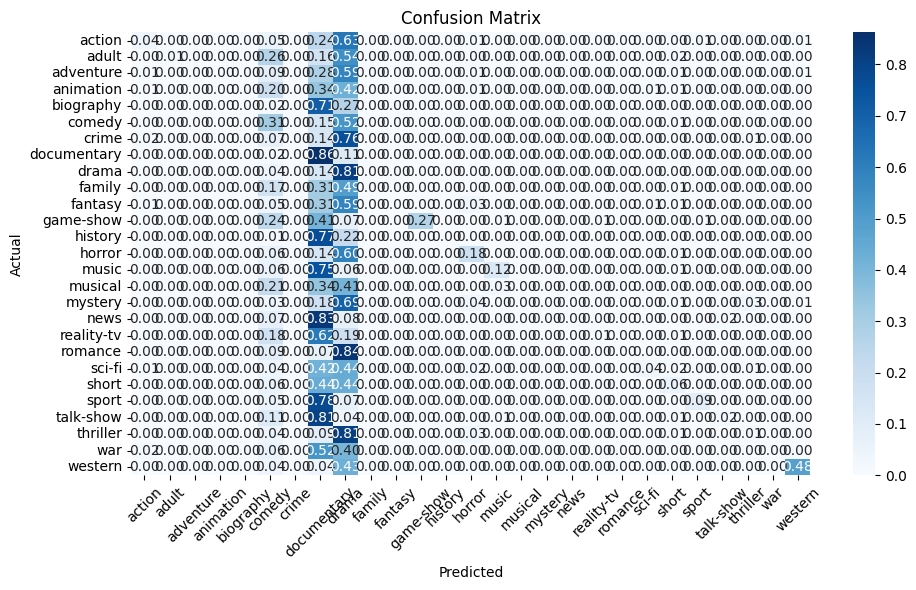

In [ ]:
cm_nb = confusion_matrix(y_test, nb_preds, labels=nb_model.classes_, normalize='true')

plt.figure(figsize=(10, 6))
sns.heatmap(cm_nb, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("Model2: Logistic Regression\n")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds,zero_division=0))

Model2: Logistic Regression

Accuracy: 0.5413152833259358
Classification Report:
               precision    recall  f1-score   support

      action       0.37      0.21      0.27      1314
       adult       0.50      0.19      0.28       590
   adventure       0.34      0.08      0.13       773
   animation       0.42      0.05      0.10       496
   biography       0.00      0.00      0.00       264
      comedy       0.47      0.51      0.49      7434
       crime       0.25      0.04      0.07       505
 documentary       0.64      0.82      0.72     13086
       drama       0.52      0.74      0.61     13560
      family       0.38      0.09      0.14       774
     fantasy       0.53      0.05      0.10       321
   game-show       0.72      0.47      0.57       193
     history       1.00      0.00      0.01       243
      horror       0.53      0.47      0.50      2203
       music       0.59      0.41      0.48       719
     musical       0.19      0.03      0.05       273

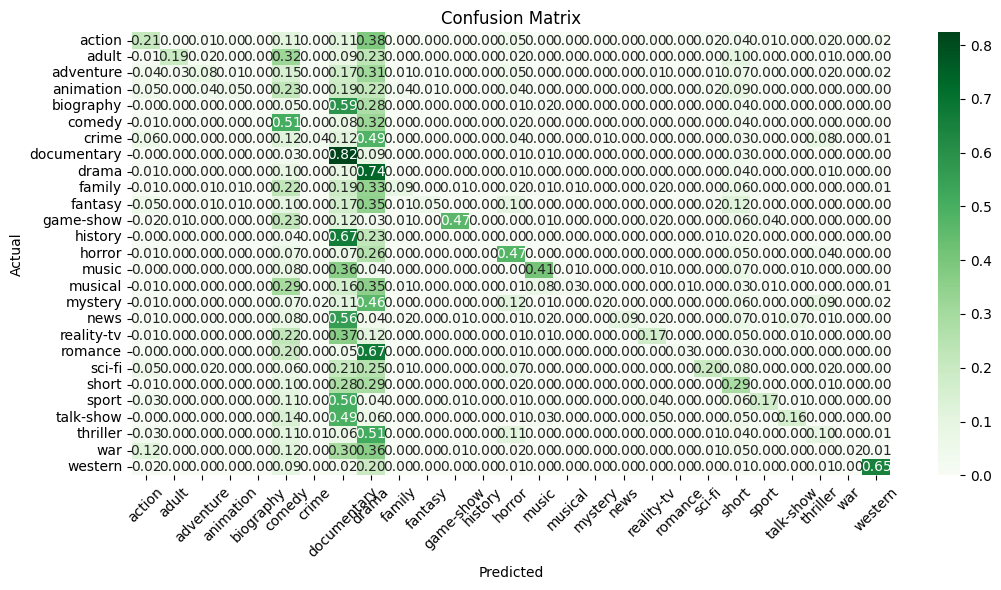

In [ ]:
cm_lr = confusion_matrix(y_test, lr_preds, labels=lr_model.classes_, normalize='true')

plt.figure(figsize=(11, 6))
sns.heatmap(cm_lr, annot=True, fmt=".2f", cmap='Greens',
            xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

print("Model3: Support Vector Machine\n")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("Classification Report:\n", classification_report(y_test, svm_preds,zero_division=0))

Model3: Support Vector Machine

Accuracy: 0.5367472998964344
Classification Report:
               precision    recall  f1-score   support

      action       0.36      0.18      0.24      1314
       adult       0.40      0.28      0.33       590
   adventure       0.29      0.05      0.08       773
   animation       0.29      0.07      0.12       496
   biography       0.00      0.00      0.00       264
      comedy       0.48      0.48      0.48      7434
       crime       0.19      0.03      0.05       505
 documentary       0.63      0.83      0.72     13086
       drama       0.51      0.73      0.61     13560
      family       0.34      0.06      0.11       774
     fantasy       0.25      0.04      0.07       321
   game-show       0.61      0.56      0.59       193
     history       0.00      0.00      0.00       243
      horror       0.49      0.51      0.50      2203
       music       0.51      0.42      0.46       719
     musical       0.15      0.03      0.05       

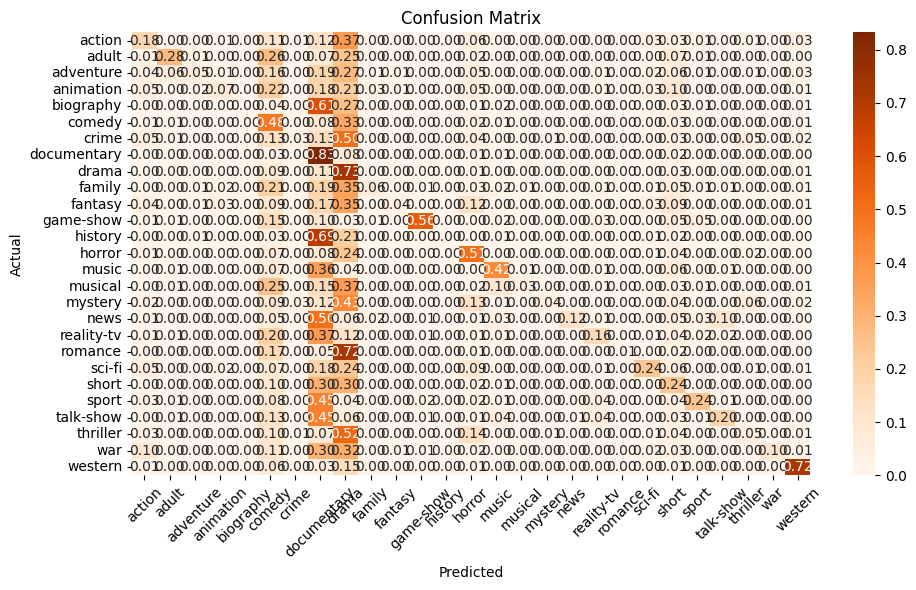

In [ ]:
cm_svm = confusion_matrix(y_test, svm_preds, labels=svm_model.classes_, normalize='true')

plt.figure(figsize=(10, 6))
sns.heatmap(cm_svm, annot=True, fmt=".2f", cmap='Oranges',
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()